In [1]:
%%HTML
<style>td {font-size:30px;font-size: 25px}</style>

# A Python Lecture Series

#### by Luca Mingarelli

# Content

### Lecture 1: Introduction, Data Types, Control Flow, Loops, Functions


### Lecture 2: I/O, Modules, NumPy, SciPy, Matplotlib, Pandas

### Lecture 3: Classes, Object Oriented Programming, and some other advanced functionalities
   

### Lecture 4: An Introduction to the ICG Toolkit

## Resources:
- [The Pyhon Tutorial](https://docs.python.org/3/tutorial/)
- [Introduction to Python for Econometrics, Statistics and Data Analysis (by Kevin Sheppard)](https://www.kevinsheppard.com/images/b/b3/Python_introduction-2016.pdf)

# Lecture 0

## Content:
   - Introduction: Python, IPython, and the Jupyther notebook 

## Python, IPython, and Jupyter notebooks

In [2]:
%%HTML
<iframe src=http://localhost:8894/terminals/1 width=1000 height=750></iframe>

In [33]:
%%HTML
<iframe src=http://localhost:8888/tree width=1000 height=750></iframe>

In [34]:
%%HTML
<iframe src=./res/A_Jupyter_notebook.ipynb width=1000 height=750></iframe>

## A few features of the Jupyter notebook

   - $P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$, i.e. $\LaTeX$ works, and in display mode as well:
   $$G_{\mu\nu}+\Lambda g_{\mu\nu} = \frac{8\pi G}{c^4}T_{\mu\nu}$$

- Multicursor support (try holding `alt` while dragging)

- On Jupyter you can add HTML code. 
E.g. `<img src="./img/ECB_logo.png" width="500">` produces the following (more easily obtained as `![alt](./img/ECB_logo.png)`):

<img src="./img/ECB_logo.png" width="500">

   - Unicode Identifiers available

In [2]:
α = 3;λ = α*3
print(λ)

9


- **Magic functions**: `%who`,`%run`, `%time`, `%timeit`, `%prun`,`%lprun`, `?`,`%matplotlib inline`, `%lsmagic`, etc. (documentation [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html)) 

### Command history + UNIX commands (prefixing `!`)

In [3]:
!ls  # shell commands!

A_new_test
Cython.ipynb
ECB Python Lectures - Lecture 0 and 1.ipynb
ECB Python Lectures - Lecture 0 and 1.slides.html
ECB Python Lectures - Lecture 2.ipynb
ECB Python Lectures - Lecture 3.ipynb
ECB Python Lectures - Lecture 4.ipynb
MODULES
Try.ipynb
__pycache__
a_work_file
img
my_new_module.py
my_plot.png
pythoncode.py
res
resources
zenofpython.py


In [4]:
%history

%%HTML
<style>td {font-size:30px;font-size: 25px}</style>
α = 3;λ = α*3
print(λ)
!ls  # shell commands!
%history


In [5]:
!pwd

/Users/Luca/Desktop/Lezioni Python


### The `%store` command lets you pass variables between two different notebooks.

In [6]:
data = 'A string I want to pass to different notebook'
%store data
del data # This has deleted the variable

Stored 'data' (str)


In [7]:
%store -r data
print(data)

A string I want to pass to different notebook


### The `%who` command without any arguments will list all variables existing in the global scope. Passing a parameter like `str` will list only variables of that type. Comment about `dir()` function as well.

In [8]:
one = "string 1"
two = "another string"
three = "and yet another one"
%who str

data	 one	 three	 two	 


Using the `%%writefile` magic saves the contents of that cell to an external file.

In [9]:
%%file zenofpython.py
'''this is a brand new file'''
import this 

Overwriting zenofpython.py


In [10]:
%run zenofpython.py

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [11]:
%%writefile pythoncode.py

import numpy 
def append_if_not_exists(arr, x):
    if x not in arr:
        arr.append(x)

def some_useless_slow_function():
    arr = list()
    for i in range(10000):
        x = numpy.random.randint(0, 10000)
        append_if_not_exists(arr, x)

Overwriting pythoncode.py


`%pycat` does the opposite, and shows you (in a popup) the syntax highlighted contents of an external file.

In [12]:
%pycat pythoncode.py

`%prun`: Show how much time your program spent in each function. Using `%prun statement_name` will give you an ordered table showing you the number of times each internal function was called within the statement, the time each call took as well as the cumulative time of all runs of the function.

In [13]:
%run pythoncode.py

In [14]:
%prun some_useless_slow_function()

# Writing  in other languages

## Maybe R?

In [15]:
import rpy2
%load_ext rpy2.ipython
%R library(ggplot2)
%R require(ggplot2)

array([1], dtype=int32)

In [16]:
import pandas as pd
df = pd.DataFrame({
 'Letter': ['a', 'a', 'a', 'b', 
            'b', 'b', 'c', 'c', 'c'],
  'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
  'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
  'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3]})
df

,Letter,X,Y,Z
0,a,4,0,1
1,a,3,4,2
2,a,5,3,3
3,b,2,6,1
4,b,1,7,2
5,b,7,10,3
6,c,7,11,1
7,c,5,9,2
8,c,9,13,3


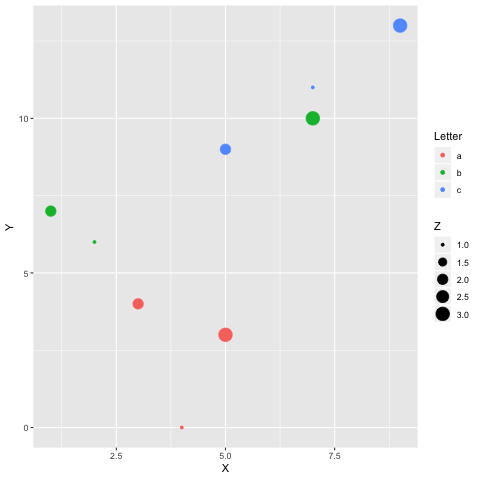

In [21]:
%%R -i df
ggplot(data = df) + geom_point(aes(x = X, y= Y, color = Letter, size = Z))

## Maybe C?

In [22]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [23]:
%%cython
def myltiply_by_2(float x):
    return 2.0 * x

In [24]:
myltiply_by_2(23.)

46.0

## Why bother?

In [25]:
%%cython
# %%cython --annotate
def slow_f(n):
    x = 100.
    for i in range(n):
        x+=n # same as x = x + n
    return x

def fast_f(int n):
    cdef double x=100.
    cdef int i
    for i in range(n):
        x+=n
    return x

In [26]:
t_s = %timeit -o slow_f(1000000)
t_f = %timeit -o fast_f(1000000)
print("Cython is ",t_s.average / t_f.average,"times faster")

37.4 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
966 µs ± 4.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Cython is  38.72351999652725 times faster


### Get help

In [27]:
?sum

Alternatively, hit `shift`+`tab` to get help:

In [28]:
sum([2])

2

In [29]:
%lsmagic

Available line magics:
%R  %Rdevice  %Rget  %Rpull  %Rpush  %alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%R  %%SVG  %%bash  %%capture  %%cython  %%cython_inline  %%cython_pyximport  %%d

Try also to hit `tab` to get auto completion and help.

# Lecture 1

## Content:

   - Introduction
   - Data Types and Structures
   - Control Flow and Loops
   - Functions and Lambda Expressions

## Introduction to Python

#### Python is:

   - An open source, multi-paradigm programming language (Functional as well as Object Oriented)

- An interpreted language
     - PROs: easy, interactive, quick development and debugging
     - CONs: might be slower (w.r.t. compiled languages such as C or Fortran - more on this later)

- A highly compact and readable language

- Python (somehow similarly to your SPAM folder) takes its name from the british comedy group *The Monty Python*

<!-- <img src="./img/python_vs_rest.png" width="600"><img src="./img/pandas_vs_matlab.png" width="600"> -->

  |Python vs rest                   | Python's Pandas vs Matlab|
  |:------------------------------- |:-------------------------------|
  |![alt](./img/python_vs_rest.png) | ![alt](./img/pandas_vs_matlab.png)|

# Data Types

## Numbers and operators

In [30]:
print(type(1))
print(type(1.0))
print(type(1+1j))
print(type(1>0))
print(type('s'))

<class 'int'>
<class 'float'>
<class 'complex'>
<class 'bool'>
<class 'str'>


We can do casting operations:

In [31]:
print(int(3.1415))
print(complex(True))

3
(1+0j)


#### Python's integers: Arbitrary precision!

Most programming languages use number *containers* with fixed bits. Thus, an unsigned 8bit integer can reach at most the number `2**8-1`, or in other words: `2**8 == 0 ` would returns `True`. This is called *integer overflow*.

Most modern machines implement 64bit architectures. However notice that in python:

In [32]:
2**2000 # Try in your favourite language...

114813069527425452423283320117768198402231770208869520047764273682576626139237031385665948631650626991844596463898746277344711896086305533142593135616665318539129989145312280000688779148240044871428926990063486244781615463646388363947317026040466353970904996558162398808944629605623311649536164221970332681344168908984458505602379484807914058900934776500429002716706625830522008132236281291761267883317206598995396418127021779858404042159853183251540889433902091920554957783589672039160081957216630582755380425583726015528348786419432054508915275783882625175435528800822842770817965453762184851149029376

![alt](./img/plot_size_int.png)

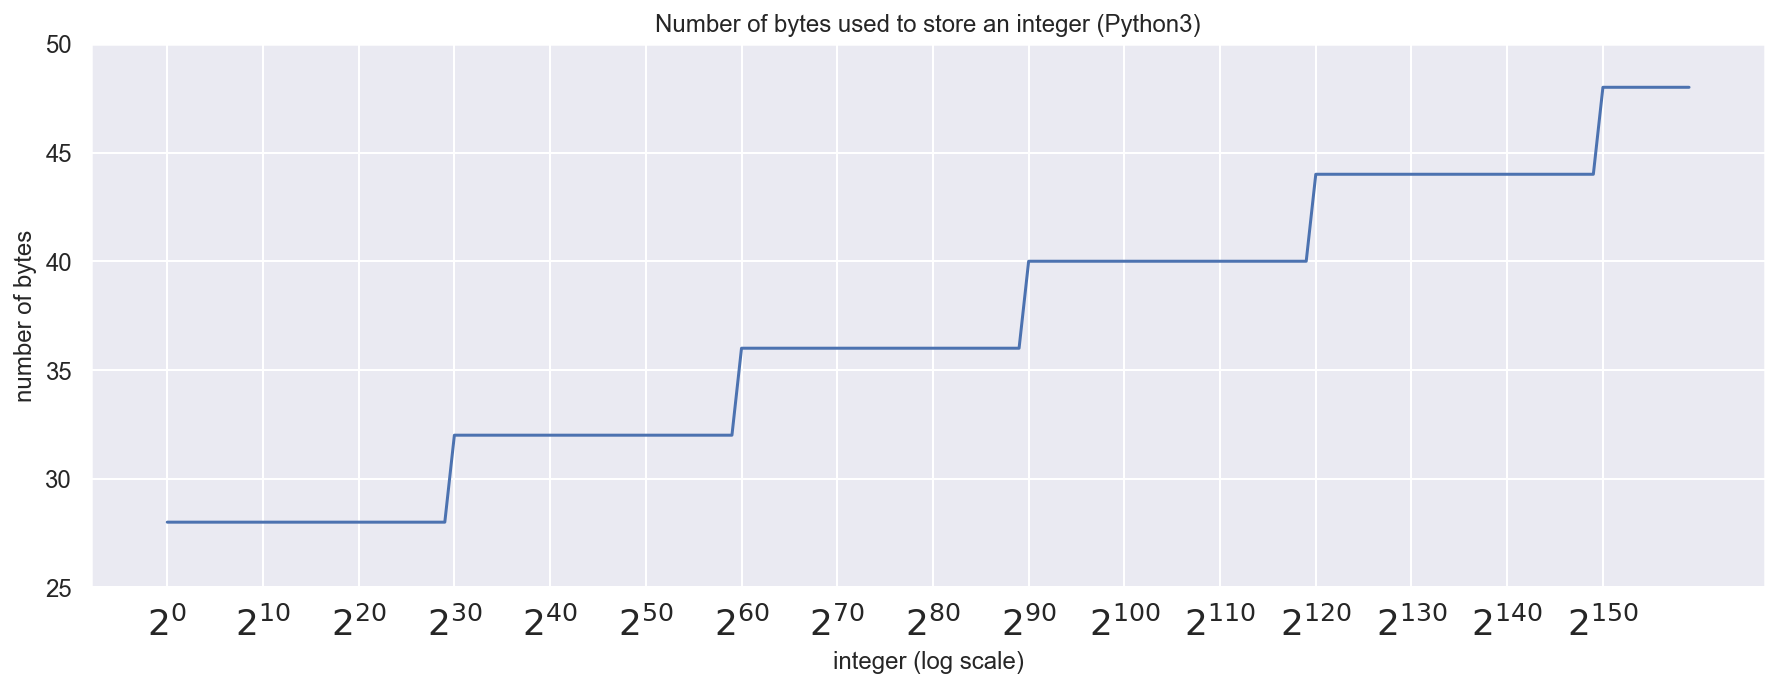

In [33]:
## plot size of int
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
seaborn.set()
from IPython.core.pylabtools import figsize
figsize(15, 5)
import sys
int_sizes = []
for i in range(160):
    int_sizes.append(sys.getsizeof(2 ** i))
fig,ax = plt.subplots()
fig.canvas.draw()
ax.plot(int_sizes)
ax.set_ylim([25, 50])
ax.set_ylabel('number of bytes')
ax.set_xlabel('integer (log scale)')
ax.set_title('Number of bytes used to store an integer (Python3)')
ax.set_xticks(range(0, 160, 10))
labels = ['$2^{%d}$' % x for x in range(0, 160, 10)]
ax.set_xticklabels(labels)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=12)

#### Can integers overflow in python?

- No, not in pure Python.
- (Yes if using other modules, such as NumPy)

#### Python's floats: a caveat

It is important to remember that floating point variables cannot be stored exactly (not in Python, nor in any other language!). Therefore one should avoid bolean evaluations such as the following:

In [34]:
.1 + .1 + .1 == .3

False

In [35]:
(2**64 + 34000.14)-2**64 
## as in any other lang

32768.0

In [36]:
(2**64 + 40.5)-2**64 

0.0

In [37]:
2.0**2000

OverflowError: (34, 'Result too large')

In [38]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

### Arithmetic operators:
   - `+` i.e. Addition
   - `-` i.e. Subtraction
   - `*` i.e. Multiplication
   - `/` i.e. Division
   - `**`i.e Power
   - `//` i.e. Floor division
   - `%` i.e. Modulus (a.k.a. remainder of the quotient)

### Assignment operators:
   - `=` i.e. assign value to variable
   - `+=` i.e. Increment assignment
   - `-=` i.e. Decrement assignment
   - `*=` i.e. Multiplication assignment
   - `/=` i.e. Division assignment
   - `**=`i.e. Power assignment
   - `//=` i.e. Floor division assignment
   - `%=` i.e. Modulus assignment

In [39]:
a = 1
a += 1 ## a = a + 1
a

2

### Relation operators:
   - `==` i.e. Equal
   - `!=` i.e. Not equal
   - `>` i.e. Greater than
   - `<` i.e. Less than
   - `>=` i.e. Greater than or equal
   - `<=`i.e. Less than or equal

### Boolean operators:
   - `and`
   - `or`
   - `not`

In [40]:
x = True
y = False 
x and y

False

In [41]:
x = 80
y = 23>0
x and y

True

### Bitwise operators:
   - `&` i.e. Bitwise AND
   - `|` i.e. Bitwise OR
   - `^` i.e. Bitwise XOR
   - `<<` i.e. Left shift (shifts the bits of the first operand left by the specified number of bits)
   - `>>` i.e. Right shift (shifts the bits of the first operand right by the specified number of bits)
   - `~` i.e. Bitwise complement (sets the 1 bits to 0 and 1 to 0 and then adds 1)

In [42]:
2 & 2 # 2&2 is (10) & (10) = (10) which is 2

2

In [43]:
6^2 # E.g. 6 is (110), and 2 is (010); hence 6^2 is (110)^(010) = (100) i.e. 4 

4

### Conditional operator:
   - `if`... `else`

In [44]:
statement = True
"Do this" if statement else "Do that"

'Do this'

### Membership operator:
   - `in`

In [45]:
'H' in 'Hello'

True

## Data Structures
   - Lists
   - Tuples
   - Sets
   - Dictionaries
   - Strings

## Lists

In [46]:
L = [1,2,3,4,5]
L

[1, 2, 3, 4, 5]

Lists can be *indexed* and *sliced*, with both positive and negative indices.

In [47]:
# Indexing starts from 0
L[0]

1

In [48]:
L[::-1]

[5, 4, 3, 2, 1]

|Slice                       | Output|          
|--|--|
|`l[:]                       ` |All elements in `l` |                                         
|`l[i]                      ` | `i`th element|                                          
|`l[i:]                     ` | all elements starting from `i`|                                           
|`l[:i]                     ` | all elements up to `i-1`|                                           
|`l[i:j] `                     |elements from `i` to `j-1` |                                                         
|`l[i:j:m]`                    |elements from `i` to `j-1` in steps of `m`  |
|`l[::m]`|from begin to end in steps of `m`|
|`l[−i]     `                 |`i`th element from the end (i.e. the `len(l)-i`th element) |
|`l[−i:]                    ` | all elements starting from the `len(l)-i`th |                                 
|`l[:−i]                    ` | all elements up to the `len(l)-i`th|
|`l[−j:−i]                   ` |elements from `len(l)-j` to `len(l)-i-1` |
|`l[−j:−i:m]`                  | elements from `len(l)-j` to `len(l)-i-1` in steps of m|
|`l[::-m]`|from end to beginning in steps of `m` |

Operators on lists act as *concatenators*

In [49]:
L = [1,2]*4
L

[1, 2, 1, 2, 1, 2, 1, 2]

Lists are objects, with their own methods:

In [50]:
L.append(100)
L

[1, 2, 1, 2, 1, 2, 1, 2, 100]

`dir` : a useful method

In [51]:
print(dir(L)[::-1])

['sort', 'reverse', 'remove', 'pop', 'insert', 'index', 'extend', 'count', 'copy', 'clear', 'append', '__subclasshook__', '__str__', '__sizeof__', '__setitem__', '__setattr__', '__rmul__', '__reversed__', '__repr__', '__reduce_ex__', '__reduce__', '__new__', '__ne__', '__mul__', '__lt__', '__len__', '__le__', '__iter__', '__init_subclass__', '__init__', '__imul__', '__iadd__', '__hash__', '__gt__', '__getitem__', '__getattribute__', '__ge__', '__format__', '__eq__', '__doc__', '__dir__', '__delitem__', '__delattr__', '__contains__', '__class__', '__add__']


Elements can be easily removed as

In [52]:
L = [0,1,2,3,4,5]
del L[1:3]
L

[0, 3, 4, 5]

or as 

In [53]:
L.pop(0)

0

|Method| Description|
|--|--|
|`list.append(x,value)  `      |    Appends value to the end of the list.                         |  
|`len(x)                `      |    Returns the number of elements in the list.                   |      
|`list.extend(x,list)   `      |    Appends the values in list to the existing list.              |            
|`list.pop(x,index)     `      |    Removes the value in position index and returns the value.    |                   
|`list.remove(x,value)  `      |    Removes the first occurrence of value from the list.          |                 
|`list.count(x,value)   `      |    Counts the number of occurrences of value in the list.        |                  
|`del x[slice]         `       |    Deletes the elements in slice.                                |                

In [54]:
L = [1,2,-3]*2
print("L = ",L,",\nThe unique values of L can be found as list(set(L)):")
print(list(set(L)))
print("Or sorted as",sorted(L),", or alternatively as")
L.sort()
L

L =  [1, 2, -3, 1, 2, -3] ,
The unique values of L can be found as list(set(L)):
[1, 2, -3]
Or sorted as [-3, -3, 1, 1, 2, 2] , or alternatively as


[-3, -3, 1, 1, 2, 2]

Notice that a list can contain objects of different types:

In [55]:
L = [1,2.0,2j,[42,42,42],'A string']
print("The type of L    is ",type(L))
print("The type of L[0] is ",type(L[0]))
print("The type of L[1] is ",type(L[1]))
print("The type of L[2] is ",type(L[2]))
print("The type of L[3] is ",type(L[3]))
print("The type of L[3] is ",type(L[4]))

The type of L    is  <class 'list'>
The type of L[0] is  <class 'int'>
The type of L[1] is  <class 'float'>
The type of L[2] is  <class 'complex'>
The type of L[3] is  <class 'list'>
The type of L[3] is  <class 'str'>


### List comprehentions
List comprehensions provide a concise way to create lists. 

In [56]:
[x for x in range(5)]

[0, 1, 2, 3, 4]

In [57]:
# Also with clause evaluation
[x if x>3 else 0 for x in range(6)]

[0, 0, 0, 0, 4, 5]

In [58]:
# Also for more complicated objects
[(x, y) for x in [0,1] for y in [3,1,4] if x != y]

[(0, 3), (0, 1), (0, 4), (1, 3), (1, 4)]

In [59]:
# Also nested
M = [[i*j+i for i in range(3)] for j in range(3)]
M

[[0, 1, 2], [0, 2, 4], [0, 3, 6]]

In [60]:
# now can be used to transpose M
[[row[i] for row in M] for i in range(len(M))]

[[0, 0, 0], [1, 2, 3], [2, 4, 6]]

## Tuples
Tuples are similar to lists, but are *immutable*.

In [61]:
T = (1,2.0,"A",[1,2,3])
T[1] = 1

TypeError: 'tuple' object does not support item assignment

**HOWEVER**: tuples can contain mutable objects:

In [62]:
T[3][0]=2
T[3].append(3.1415)
print(T)

(1, 2.0, 'A', [2, 2, 3, 3.1415])


 You may wonder what the point of tuples is: one answer is that when tuples are possible, it’s more computationally efficient to work with them than with lists.

In [63]:
N =1000000
%timeit T = (x for x in range(N))
%timeit L = [x for x in range(N)]

772 ns ± 35 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
80.4 ms ± 4.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
T = (x for x in range(N))
L = [x for x in range(N)]
%timeit sum(T)
%timeit sum(L)

116 ns ± 1.97 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
6.15 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Sets
A set is an unordered collection with no duplicate elements. 

In [65]:
DGMF = {"MAP","SRF","STM","FRP","MBF","MBF","MBF", "SRF"}
print(DGMF)
'SRF' in DGMF

{'MAP', 'MBF', 'STM', 'FRP', 'SRF'}


True

In [66]:
Pangram = "The quick brown fox jumps over the lazy dog"#.lower().replace(" ","")
alphabet = sorted(set(Pangram))
print(alphabet)

[' ', 'T', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Set comprehensions are also supported:

In [67]:
{div for div in DGMF if div not in {"FRP","MBF"}}

{'MAP', 'SRF', 'STM'}

|Operation                  |	Equivalent	|Result|
|---------------------------|---------------|------|
|`len(s)	`		 		| 		NA 		| 	cardinality of set `s`|
|`x in s	`		 		| 	 	NA	 	|	test `x` for membership in `s`|
|`x not in s` 		 		| 	    NA        |    test `x` for non-membership in `s`|
|`s.issubset(t)	`           |   `s <= t	`	| 	test whether every element in `s` is in `t`|
|`s.issuperset(t)`	        |   `s >= t	`	| 	test whether every element in `t` is in `s`|
|`s.union(t)`	            |   `s \| t`	    | 	new set with elements from both `s` and `t`|
|`s.intersection(t)`	    |   `s & t	` 	| 	new set with elements common to `s` and `t`|
|`s.difference(t)`	        |   `s - t	`	| 	new set with elements in `s` but not in `t`|
|`s.symmetric_difference(t)`|	`s ^ t	`	| 	new set with elements in either `s` or `t` but not both|



## Dictionaries
A dictionary is a set of keys with values (or other objects) associated to each key.
Keys can be any immutable type; strings and numbers can always be keys. Tuples can be used as keys if they contain only strings, numbers, or tuples; if a tuple contains any mutable object either directly or indirectly, it cannot be used as a key. You can’t use lists as keys, since lists can be modified.

In [68]:
D1 = {'one':1,'two':2,'three':3}
# or similarly as
D2 = dict(one=1, two=2, three=3)

print(D2['two']) if D1 == D2 else 0

2


Dictionary comprehensions are allowed:

In [69]:
{x: x**2 for x in (2, 4, 6)}

{2: 4, 4: 16, 6: 36}

In [70]:
DGMF = ["MAP","SRF","STM","FRP","MBF"]
DGMF_ext = ["Macroprudential Policy","Systemic Risk and Financial Institutions","Stress Test Modelling",
        "Financial Regulation and Policy","Market-Based Finance"] ## why using lists instead of sets?
DGMF = {str(div): div_ext for div,div_ext in zip(DGMF,DGMF_ext)}
DGMF['SRF']

'Systemic Risk and Financial Institutions'

## Strings

In [71]:
S = 'This is a string'
print(S)

This is a string


In [72]:
S = "This as well, but I can also quote 'Quousque tandem abutere, [...]'"
print(S)

This as well, but I can also quote 'Quousque tandem abutere, [...]'


In [73]:
S = '''Also this is a string,
but I can split it over more lines
        preserving indentation'''
print(S)

Also this is a string,
but I can split it over more lines
        preserving indentation


Strings can be *indexed* and *sliced*:

In [74]:
S[5]

't'

In [75]:
S[:21]

'Also this is a string'

#### String Formatting

In [76]:
print('The radius of %s is %.2f metres' % ('Jupiter', 69911000))
print('The radius of %s is %i metres' % ('Jupiter', 69911000))

The radius of Jupiter is 69911000.00 metres
The radius of Jupiter is 69911000 metres


### A summary of Python's data types

| Data Type | Example   | Mutable? | Order preserving? | Casting|
|-----------|-----------|----------|-------------------|---------|
|   Integer | 1         | Y        | N/A               |`int()`  |
|   String  | "word" or 'word'| N  | Y                 |`str()`  |
|   List    |[1,2,3]    | Y        | Y                 |`list()` |
|   Tuple   |(1,2,3)    | N        | Y                 |`tuple()`|
|   Set     |{1,2,3}    | N        | N                 |`set()`  |
|Dictionary |{'A': 'apple', 'x' : 3}| Y| N             |`dict()` |


## Control Flow and Loops

### `if`-`elif`-`else ` statements
Notice the `:` symbol and **indentation**. They are both mandatory!

In [39]:
x = int(input("Insert an integer: "))
if x>0:
    print(x,"is positive.")
elif x<0:
    print(x,"is negative.")
else:
    print(x,"is zero.")

Insert an integer: 3
3 is positive.


### `for` statements
Notice the `:` symbol and **indentation**. They are both mandatory!

In [78]:
for div in DGMF:
    print(DGMF[div], '(' + div + ')')

Macroprudential Policy (MAP)
Systemic Risk and Financial Institutions (SRF)
Stress Test Modelling (STM)
Financial Regulation and Policy (FRP)
Market-Based Finance (MBF)


#### The `range()` function

In [79]:
for i in range(3):
    print(i)

0
1
2


In [80]:
range(3)
# list(range(3))

range(0, 3)

#### The `enumerate()` function

In [81]:
for i,div in enumerate(DGMF):
    print(i+1,DGMF[div], '(' + div + ')')

1 Macroprudential Policy (MAP)
2 Systemic Risk and Financial Institutions (SRF)
3 Stress Test Modelling (STM)
4 Financial Regulation and Policy (FRP)
5 Market-Based Finance (MBF)


#### The `zip()` function

In [82]:
EU_founders = ['DE', 'FR', 'IT', 'NL', 'BE','LU']
Founders_capitals = ['Berlin', 'Paris', 'Rome', 'Amsterdam', 'Brussels'] # Notice I forgot one...
Founders_lang = ['German','French', 'Italian', 'Dutch'] # Notice I forgot another one...
list(zip(EU_founders,Founders_capitals, Founders_lang))

[('DE', 'Berlin', 'German'),
 ('FR', 'Paris', 'French'),
 ('IT', 'Rome', 'Italian'),
 ('NL', 'Amsterdam', 'Dutch')]

### The `while` loop

In [83]:
while True:
    print('Hello')
    break

Hello


### `break` and `continue` Statements, and `else` Clauses on Loops
The `else` clause is executed when the loop terminates through exhaustion of the list (with for) or when the condition becomes false (with while), but not when the loop is terminated by a break statement. 

In [84]:
for n in range(2, 10):
    for x in range(2, n):
        if n % x == 0:
            print(n, 'equals', x, '*', n//x)
            break
        else:
            continue
    else:
        # loop fell through without finding a factor
        print(n, 'is a prime number')

2 is a prime number
3 is a prime number
4 equals 2 * 2
5 is a prime number
6 equals 2 * 3
7 is a prime number
8 equals 2 * 4
9 equals 3 * 3


## Functions

In [85]:
def test():
    print('Hello from test function')

Now the function is callable:

In [86]:
test()

Hello from test function


The first statement of the function body can optionally be a string literal; this string literal is the function’s documentation string, or *docstring*. 

In [52]:
def circle_area(radius):
    '''Compute the area of a circle given its radius.'''
    return 3.14 * radius * radius 
##notice the purpose of return: anything else defined within the function does not exist outside of it!

In [53]:
A = circle_area(2)
A

12.56

In [54]:
circle_area.__doc__

'Compute the area of a circle given its radius.'

Functions' arguments can have default values:

In [41]:
def pi(acc = 100):
    '''Computes pi 
    through the Wallis formula'''
    pi = 1
    for i in range(1,acc):
        pi *= 1/(1-1/(4*i**2))
    pi *= 2
    return pi

The Wallis formula is
$$\frac{\pi}{2} = \prod _{n = 1}^\infty \left(1-\frac{1}{4n^2}\right)^{-1}$$

In [42]:
pi()

3.1337091459408954

Functions are first-class objects, which means they can be assigned to:
   - a variable
   - an item in a list (or any collection)
   - passed as an argument to another function.

In [43]:
P = pi
P()

3.1337091459408954

In [45]:
import math
P(10000)- math.pi

-7.854276119667603e-05

In [94]:
def circle_area(radius, PI = None, acc = None):
    '''Compute the area of a circle given its radius.'''
    if PI == None:
        pi = 3.14
    elif acc == None:
        pi = PI()
    else:
        pi = PI(acc)
    return pi * radius * radius

circle_area(1)
circle_area(1,P)
# circle_area(1,P,100000)

3.1337091459408954

### Passing Values to functions and variable scopes

**A Rule:** 
- If the value passed to a function is *immutable* (`bool`,`int`,`float`,`str`,`tuple`,etc.), the function does not modify the variable after execution. 
- If the value is *mutable* (`list`,`set`,`dict`), the function may modify the caller’s variable in-place.

In [8]:
def modify(x1, x2, x3,x4):
    x1 = 23
    x2.append(42)
    x3 = [99] # new reference
    x4 = 3.14
    print(x1,x2,x3,x4)
a = 77; b = [10]; c = [20]; d=(1,2)
modify(a, b, c, d)
print(a,b,c,d)

23
[10, 42]
[99]
3.14
77 [10, 42] [20] (1, 2)


In [11]:
def modify(x):#HOWEVER
    x[1].append(3)
    print(x)
a = (0,[1,2])
modify(a)
print(a)

(0, [1, 2, 3])
(0, [1, 2, 3])


#### Variable number of inputs

- `*args`: an arbitrary number of positional arguments inside of a tuple
- `**kwargs`: an arbitrary number of keyword arguments inside a dictionary

In [26]:
def variable_args(*args, **kwargs):
    print('args is', args)
    print('kwargs is', kwargs)
variable_args('one', 'two',3, x=1, y=2, z=3)

args is ('one', 'two', 3)
kwargs is {'x': 1, 'y': 2, 'z': 3}


In [32]:
def my_own_sum(*args):
    S = args[0]
    for n in args[1:]:
        S += n
    return S
my_own_sum(1,1,1,1)

4

#### Global variables

In [55]:
s = 'A string in the global scope'
def func():
#     global s
#     s = "A string in func's scope "
    print(s+"exists also inside the function")
func()
print(s)

A string in the global scopeexists also inside the function
A string in the global scope


## Lambda Expressions

Lambda expressions are small anonymous functions syntactically restricted to a single expression.

In [95]:
plus_3 = lambda x: x+3
plus_3(1)

4

In [96]:
def plus_n(n):
    return lambda x: x + n
plus_5 = plus_n(5)
plus_5(1)

6

In [97]:
pairs = [(1, 'one'), (2, 'two'), (3, 'three'), (4, 'four')]
pairs.sort(key=lambda pair: pair[1])
pairs

[(4, 'four'), (1, 'one'), (3, 'three'), (2, 'two')]

The advantage is that you do not need to bind the (lambda) function to a name.

In [49]:
## Another example where lambda functions are particularly useful
multiple_of_three = filter(lambda x: x % 3 == 0, [1, 2, 3, 4, 5, 6, 7, 8, 9])
list(multiple_of_three)

[3, 6, 9]

# End of Lecture 1

# An Exercise:

Write a function `Pascal(n)` that that returns the first `n` rows of Pascal's triangle (also known as Tartaglia's triangle). Then, write a function `verify_binomial_theorem(x,y,n)` which verifies the binomial theorem $(x+y)^n = \sum_{k=0}^n  P_{n,k}x^{n-k}y^k$, where $P_{n,k}$ is the $k$-th coefficient of the $(n+1)$-th row of a the Pascal triangle.
![alt](./img/pascal.jpeg)

In [98]:
def Pascal(n):
    row = [1]
    T=[row]
    for _ in range(n):
        row=[l+r for l,r in zip(row+[0], [0]+row)]
        T.append(row)
    return T
Pascal(6)

[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1]]

In [99]:
def bin_exp(x,y,n):
    return sum([x**(n-k) * y**k *coeff for k,coeff in zip(range(n+1),Pascal(n)[-1])])

def verify_binomial_theorem(x,y,n):
    return bin_exp(x,y,n) == (x+y)**n

verify_binomial_theorem(253,28,52)

True

## And a (slightly) more challenging one:

A *number triangle* is a sequence of numbers starting from a 1-digit number, followed by a 2-digit number, etc. For example:

<font color='red'>7</font> 

<font color='red'>3</font>8

<font color='red'>8</font>10

2<font color='red'>7</font>44

4<font color='red'>5</font>265

Write a function `Max_Path(T)` taking as input the number triangle `T` as a list of integers representing each level. The function should compute the highest sum of digits on a specific path starting at the top and ending somewhere at the base, following the rule that each step can only go *directly-down* or *down-right*.

In the example the maximising path is highlighted in red.

(Tip: use a bottom-up approach)

__Test it on `T=[7,38,810,2744,45265]`: you should find `Max_Path(T)=30`__.

Then, use the following function to generate a triangle of length `L`:
```python 
    def gen_T(L):
        from random import randint, seed
        seed(100)
        T=[]
        for n in range(L):
            T.append(randint(10**(n) ,10**(n+1)-1))
        return T```
__Test it for `L=50`: you should find `Max_Path(gen_T(50)) = 333`__.